In [1]:

# Importing the libraries
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [2]:
# Importing the dataset
data = pd.read_excel('CFPP_Jahirul.xlsx',sheet_name = 'Main')


In [3]:
data.head()
#data.shape
#type(data)

,12:00,14:00,Below 14,16:00,16:01,18:00,18:01,18:02,18:03,20:00,20:01,Above 20,22:01,24:01,CFPP
0,0.0,0.00,0.00,4.51,0.36,2.00,60.33,21.24,9.49,0.62,1.49,0.51,0.35,0.16,-8.8
1,0.0,0.00,0.00,11.81,0.12,2.13,27.35,57.74,0.63,0.34,0.33,0.14,0.00,0.14,-7.5
2,0.0,0.72,0.72,25.93,0.36,1.74,15.98,55.12,0.16,0.22,0.07,0.11,0.11,0.00,4.8
3,0.0,0.10,0.10,7.25,0.10,3.43,10.80,77.25,5.40,0.00,0.10,0.00,0.00,0.00,11.0
4,0.0,0.00,0.00,6.32,0.30,3.71,79.17,10.67,0.15,0.10,0.10,0.00,0.00,0.00,-10.2


In [4]:
len(data)

267

In [5]:
X = data.drop(labels= ['CFPP','Below 14','24:01','Above 20'], axis=1)
y = data['CFPP']


In [6]:
# Descriptive statistics for each column
y.describe()

count    267.000000
mean      -0.798502
std        7.238197
min      -20.000000
25%       -6.000000
50%       -2.000000
75%        3.500000
max       17.000000
Name: CFPP, dtype: float64

In [7]:
X.describe()

,12:00,14:00,16:00,16:01,18:00,18:01,18:02,18:03,20:00,20:01,22:01
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.237846,0.504710,15.719251,0.291835,4.551142,40.948315,26.282884,9.787172,0.381348,0.561835,0.185000
std,2.992665,1.462131,10.583535,0.797944,3.690107,17.361222,17.827417,15.760301,0.322834,1.874238,0.500423
min,0.000000,0.000000,1.400000,0.000000,0.150000,5.600000,0.700000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.990000,0.000000,3.000000,27.530000,10.910000,0.325000,0.210000,0.000000,0.000000
50%,0.000000,0.180000,12.580000,0.000000,4.000000,40.070000,21.340000,3.000000,0.340000,0.180000,0.000000
75%,0.000000,0.540000,21.310000,0.185000,4.540000,52.825000,36.280000,8.810000,0.480000,0.500000,0.200000
max,48.800000,17.200000,47.200000,6.650000,34.700000,82.000000,77.250000,82.200000,3.100000,16.800000,4.200000


In [8]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


<AxesSubplot:>

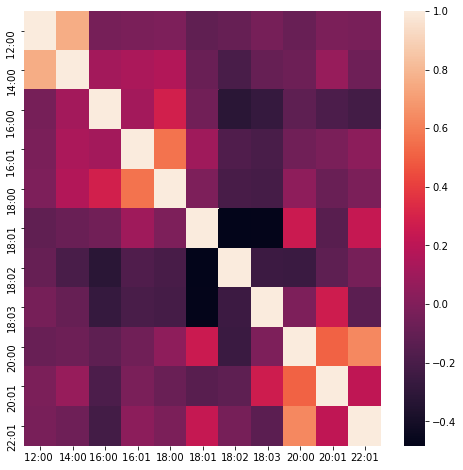

In [9]:
#Idenitfy corelated independent variables through heatmap
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(corrmat)

In [10]:
X_train.count()

12:00     213
14:00     213
16:00     213
16:01     213
18:00     213
18:01     213
18:02     213
18:03     213
20:00     213
20:01     213
22:01     213
dtype: int64

The training R2 is:  0.7934401483192679
The test R2 is:  0.8873404200955429
MSE: 5.09
RMSE of test set: 2.26
RMSE of train set: 3.34
The mean accuracy is:  0.39176195275167863


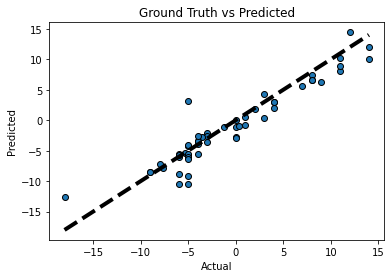

In [11]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

# The mean squared error & Variance

from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))

#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())

#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

The training R2 is:  0.7137825057430623
The test R2 is:  0.9127012177909327
MSE: 3.94
RMSE: 1.99
The mean accuracy is:  0.6475397967821133


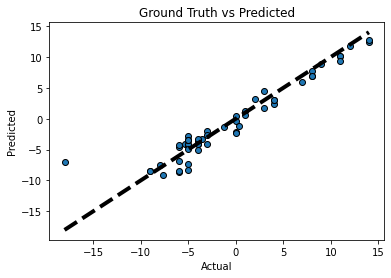

In [12]:
# Fitting Support Vector Regression to the Training set

from sklearn.svm import SVR
model = SVR(C=10.0, cache_size=100, coef0=0.1, degree=2, epsilon=0.5,kernel = 'rbf')
model.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

# The mean squared error & Variance

from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = model.predict(X_test)

print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
""""#Gridsearch SVR

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=22)
model = SVR()
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01],
              'degree':[2,3],
              'epsilon':[0.1,0.5,1,10],
              'kernel': ['linear','poly','rbf']} 


tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=3,
                          verbose=1,
                          n_jobs=-1)
    
tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 29.4min


The training R2 is:  0.9674967184086937
The test R2 is:  0.934292297186299
MSE: 2.97
RMSE: 1.72
The mean accuracy is:  0.7176576852621219


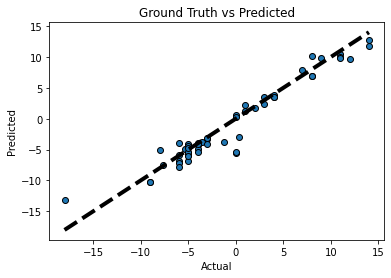

In [13]:
# Fitting RandomForest Regression to the Training set

from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators = 500,max_depth=20,random_state=0)
model.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = model.predict(X_test)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()



In [14]:
from xgboost import XGBRegressor

The training R2 is:  0.9997824018333265
The test R2 is:  0.9026842894468464
MSE: 4.40
RMSE of test set: 2.10
RMSE of train set: 0.11
The mean accuracy is:  0.686828814749237


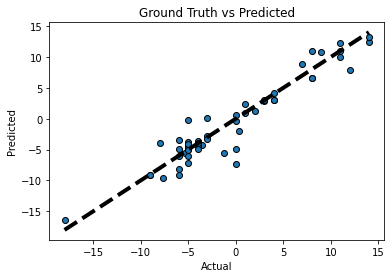

In [16]:
# Fitting XGB Regression to the Training set

model = XGBRegressor()

model.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


In [17]:
#Grid search for XGB

from sklearn.model_selection import GridSearchCV

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=22)
model = XGBRegressor()
param_grid = {'eta':[0.05,0.1,0.15,0.2],
                 'max_depth':[4,6,8,10],
                 'subsample':[0.5,1],
                 'colsample_bytree':[0.5,1],
                 'eval_metric':['rmse'],
                 'seed':[42],
                 'n_estimators':np.arange(100,1001,100).tolist()}


tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=3,
                          verbose=1,
                          n_jobs=-1)
    
tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits
Best parameters:
{'colsample_bytree': 1, 'eta': 0.1, 'eval_metric': 'rmse', 'max_depth': 6, 'n_estimators': 100, 'seed': 42, 'subsample': 1}


The training R2 is:  0.9990011859250938
The test R2 is:  0.8775112413985005
MSE: 5.73
RMSE of test set: 2.39
RMSE of train set: 0.23
The mean accuracy is:  0.7258071890785821


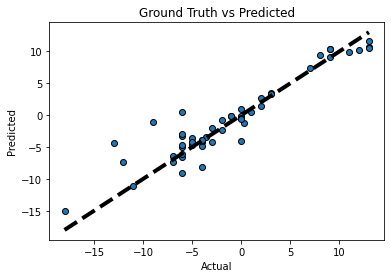

In [19]:
modelXGB = XGBRegressor(colsample_bytree = 1, eta = 0.1, eval_metric= 'rmse', max_depth= 6,
                     n_estimators= 100, seed= 42, subsample= 1)

modelXGB.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelXGB.score(X_train,y_train)
print("The training R2 is: ", modelXGB.score(X_train, y_train))
print("The test R2 is: ", modelXGB.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelXGB.predict(X_test)
y_predicted_train = modelXGB.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelXGB, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


In [36]:
#Grid search for RF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=22)
model = RandomForestRegressor()
param_grid = {'eta':[0.05,0.1,0.15,0.2],
                 'max_depth':[4,6,8,10],
                 'subsample':[0.5,1],
                 'colsample_bytree':[0.5,1],
                 'eval_metric':['rmse'],
                 'seed':[42],
                 'n_estimators':np.arange(100,1001,100).tolist()}


param_grid={'n_estimators':np.arange(100,1001,100).tolist(),
                'max_features':['sqrt'],
                'max_depth':[20,40,60,80,None],
                'min_samples_split':[2,6,10]}

tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=3,
                          verbose=1,
                          n_jobs=-1)
    

tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min


Best parameters:
{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.1min finished


The training R2 is:  0.9677673577445044
The test R2 is:  0.912200492022273
MSE: 4.11
RMSE of test set: 2.03
RMSE of train set: 1.31
The mean accuracy is:  0.7857483459454377


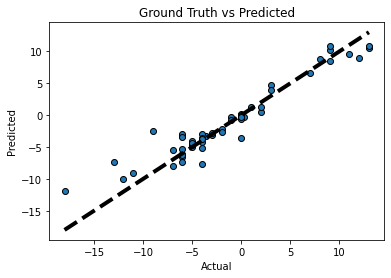

In [20]:
modelRF = RandomForestRegressor(max_depth = 40, max_features = 'sqrt', min_samples_split = 2, n_estimators = 100)

modelRF.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelRF.score(X_train,y_train)
print("The training R2 is: ", modelRF.score(X_train, y_train))
print("The test R2 is: ", modelRF.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelRF.predict(X_test)
y_predicted_train = modelRF.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelRF, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

# Perform Causal analytics - Accumulated Local Effects

In [21]:
names= data.columns[0:13]
names

Index(['12:00 ', '14:00', 'Below 14', '16:00 ', '16:01 ', '18:00', '18:01',
       '18:02', '18:03', '20:00', '20:01', 'Above 20', '22:01'],
      dtype='object')

In [22]:
from alibi.explainers import ALE, plot_ale

In [23]:
rf_ale = ALE(modelRF.predict, feature_names = X_train.columns, target_names = ['CFPP'])
rf_exp = rf_ale.explain(np.array(X_train))

No handles with labels found to put in legend.


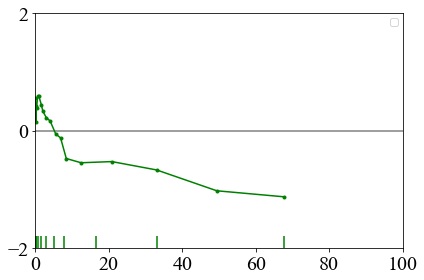

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from cycler import cycler
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'
matplotlib.rcParams['axes.prop_cycle'] =  cycler(color =['g'])


label_size = 20
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 


#matplotlib.rcParams['legend.loc'] = []

tick_spacing = 2

fig, ax = plt.subplots()

plot_ale(rf_exp,features = ['18:03'],ax=ax,line_kw={'label':'_nolegend_'})
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xlim([0, 100])
ax.set_ylim([-2, 2])
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#plt.savefig("CFPP_18_3.png",dpi=300)

# Shap analysis

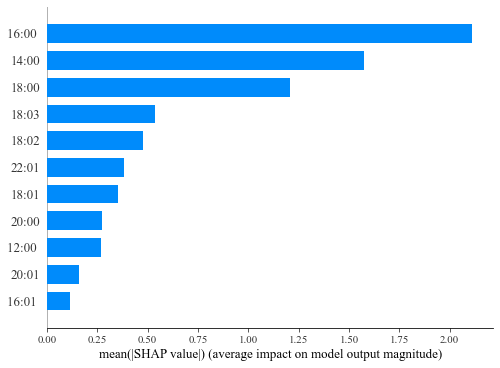

In [25]:
import shap
shap_values = shap.TreeExplainer(modelRF).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Perform optimization - Prescriptive analytics

In [79]:
from pyswarm import pso

In [84]:
def objective(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    x5=x[4]
    x6=x[5]
    x7=x[6]
    x8=x[7]
    x9=x[8]
    x10=x[9]
   
    
    x11 = 100-(x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]+x[8]+x[9])
    
    if x11<0:
        CV = 10000000
    else:
        CV = 0  
    
    X_optPSO = np.array ([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11]).reshape(1, -1)
    
    y_predoptPSO = modelRF.predict(X_optPSO) + CV
    return (y_predoptPSO)
    


lb = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0]
ub = [1, 1,17, 1,5, 88,62,67,1, 7.5,1]
      

#Run multiple rounds of optimization to get a decent sense of the values 
for fopt in range(5):
    xopt, fopt = pso(objective, lb, ub)
    total = np.sum(xopt)
                   
    print(xopt, fopt)
    print(total)


Stopping search: maximum iterations reached --> 100
[ 0.71277145  0.08853871  2.14778232  0.6665943   1.53925172 11.89381784
 32.99836876 44.77926887  0.21127622  4.90792392  0.6067302 ] [-11.47]
100.5523243102684
Stopping search: maximum iterations reached --> 100
[2.60815639e-01 1.60260782e-01 1.94840125e+00 5.97199300e-01
 1.36193532e-02 1.44382473e+00 4.11745369e+01 5.11316135e+01
 5.01162294e-01 2.71651708e+00 6.76154279e-01] [-11.23]
100.62410517115903
Stopping search: maximum iterations reached --> 100
[ 0.39082683  0.11899867  0.34152633  0.15817656  0.55665583 55.35914621
 16.81706021 20.10837343  0.50744576  5.5679414   0.54557633] [-12.593]
100.47172755167364
Stopping search: maximum iterations reached --> 100
[ 0.53273781  0.23042632  8.22144668  0.4553596   1.1233318  26.41251937
 19.46788024 41.79021275  0.69047463  1.06644764  0.74395297] [-10.193]
100.73478980719727
Stopping search: maximum iterations reached --> 100
[5.22071281e-01 8.47082963e-01 3.54239998e+00 3.60627